Dataset Overview:
   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       37

<ipython-input-18-587fb2645334>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




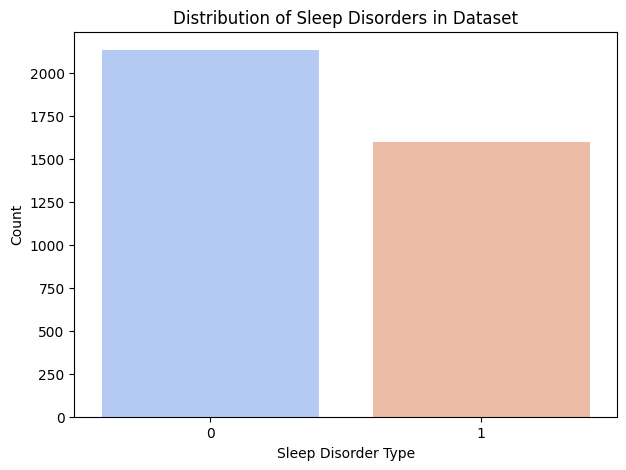


Training Logistic Regression...
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       438
           1       0.63      0.65      0.64       309

    accuracy                           0.70       747
   macro avg       0.69      0.69      0.69       747
weighted avg       0.70      0.70      0.70       747



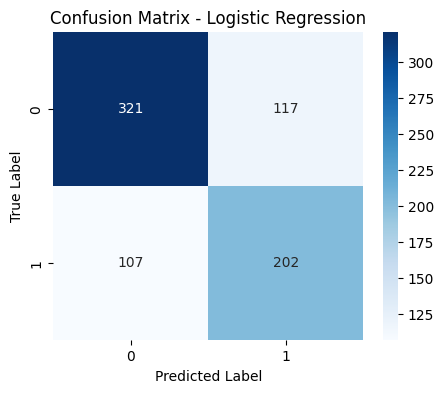


Training Random Forest...
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       438
           1       0.76      0.70      0.73       309

    accuracy                           0.78       747
   macro avg       0.78      0.77      0.78       747
weighted avg       0.78      0.78      0.78       747



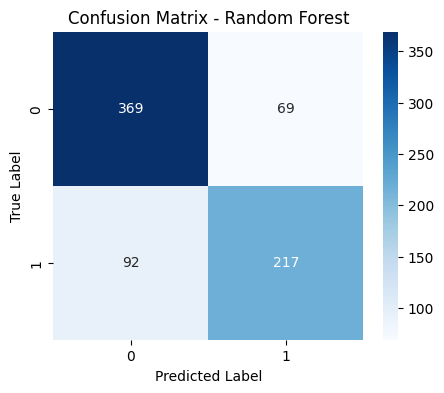


Training SVM...
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       438
           1       0.66      0.78      0.71       309

    accuracy                           0.74       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.74      0.74       747



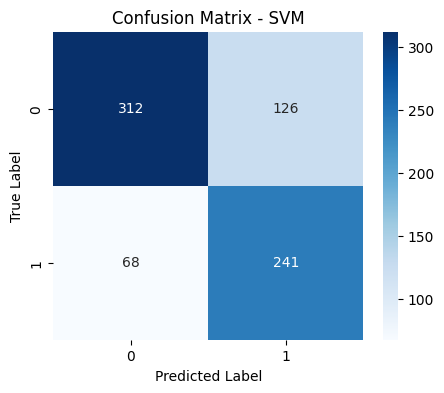


Training KNN...
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       438
           1       0.62      0.71      0.66       309

    accuracy                           0.70       747
   macro avg       0.69      0.70      0.69       747
weighted avg       0.71      0.70      0.70       747



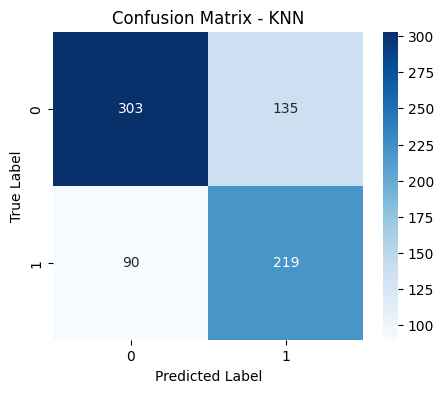


Training Neural Network...
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       438
           1       0.69      0.72      0.70       309

    accuracy                           0.75       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.75      0.75       747



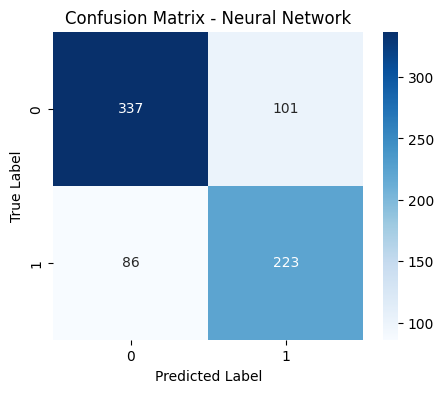

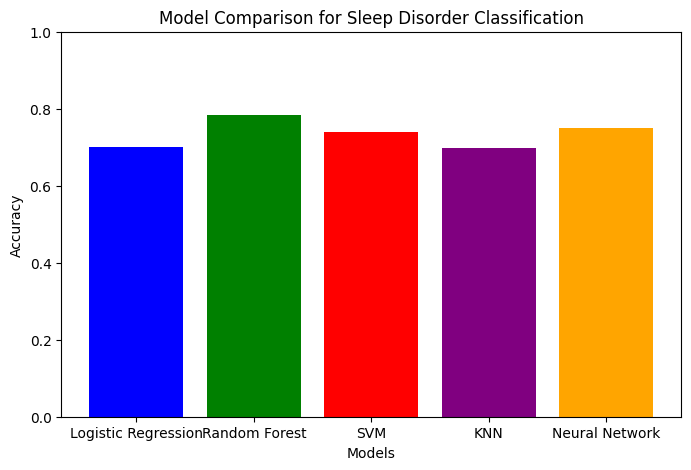

<ipython-input-18-587fb2645334>:106: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




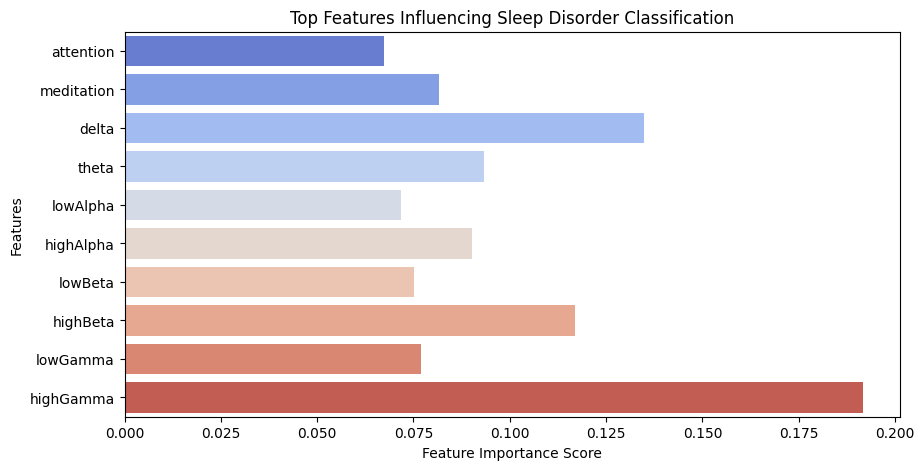

In [18]:
# Import required libraries
import zipfile  # To extract ZIP files
import os  # To handle file operations
import pandas as pd  # To load and manipulate datasets
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations
from sklearn.model_selection import train_test_split  # To split dataset
from sklearn.preprocessing import StandardScaler  # To normalize data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Model
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Model
from sklearn.neural_network import MLPClassifier  # Neural Network Model

# Extract the ZIP File
zip_file_path = "archive_3.zip"  # Path to the uploaded ZIP file
extract_folder = "sleep_disorder_data"  # Folder to extract dataset

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract all files to the specified folder

# Detect and Load the Dataset
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]  # List CSV files

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the ZIP archive!")  # Handle missing data

# Assuming the dataset we need is the first CSV file found
dataset_path = os.path.join(extract_folder, csv_files[0])  # Get file path
df = pd.read_csv(dataset_path)  # Load dataset

# Explore the Dataset
print("Dataset Overview:")
print(df.head())  # Display first 5 rows
print("\nData Summary:")
print(df.info())  # Display dataset information

# Sleep Disorder Data Analysis
plt.figure(figsize=(7, 5))  # Set figure size
sns.countplot(x=df.iloc[:, -1], palette="coolwarm")  # Plot class distribution
plt.xlabel("Sleep Disorder Type")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Distribution of Sleep Disorders in Dataset")  # Title
plt.show()

# Preprocess the Data
X = df.iloc[:, :-1]  # Features (All columns except the last one)
y = df.iloc[:, -1]  # Target variable (Last column - sleep disorder label)

# Normalize features
scaler = StandardScaler()  # Initialize Standard Scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

# Train and Evaluate Models
results = {}  # Dictionary to store accuracy scores

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy  # Store accuracy
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5, 4))  # Set figure size
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Compare Model Performance
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])  # Plot bar chart
plt.xlabel("Models")  # X-axis label
plt.ylabel("Accuracy")  # Y-axis label
plt.title("Model Comparison for Sleep Disorder Classification")  # Title
plt.ylim(0, 1)  # Set Y-axis range
plt.show()

# Feature Importance (Using Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize RF Model
rf_model.fit(X_train, y_train)  # Train the model
feature_importance = rf_model.feature_importances_  # Get feature importances

# Plot feature importance
plt.figure(figsize=(10, 5))  # Set figure size
sns.barplot(x=feature_importance, y=X.columns, palette="coolwarm")  # Plot feature importance
plt.xlabel("Feature Importance Score")  # X-axis label
plt.ylabel("Features")  # Y-axis label
plt.title("Top Features Influencing Sleep Disorder Classification")  # Title
plt.show()


OTHER MODELS

Dataset Overview:
   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       37

<ipython-input-19-783a6f545371>:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




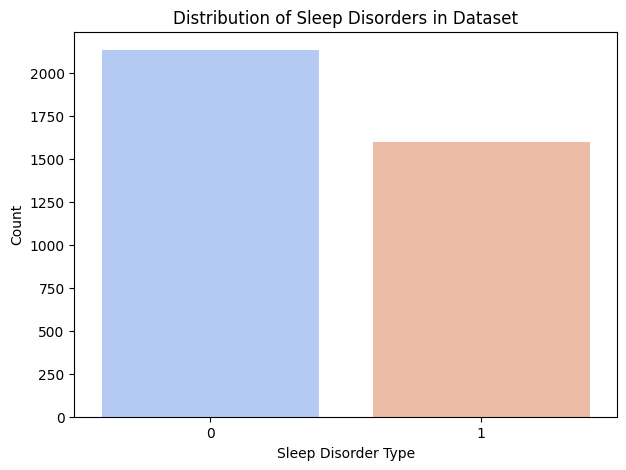


Training Logistic Regression...
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       438
           1       0.63      0.65      0.64       309

    accuracy                           0.70       747
   macro avg       0.69      0.69      0.69       747
weighted avg       0.70      0.70      0.70       747



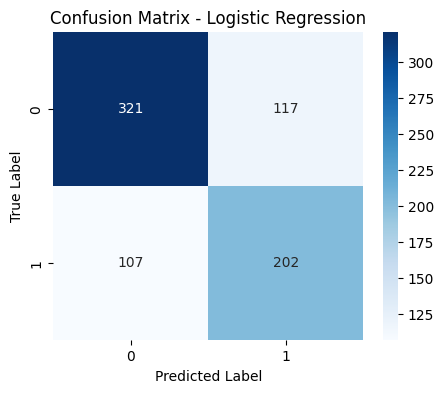


Training Random Forest...
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       438
           1       0.76      0.70      0.73       309

    accuracy                           0.78       747
   macro avg       0.78      0.77      0.78       747
weighted avg       0.78      0.78      0.78       747



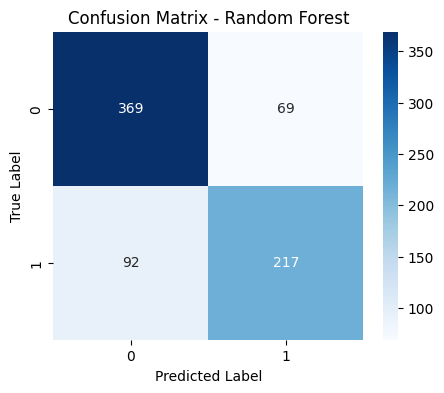


Training SVM...
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       438
           1       0.66      0.78      0.71       309

    accuracy                           0.74       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.74      0.74       747



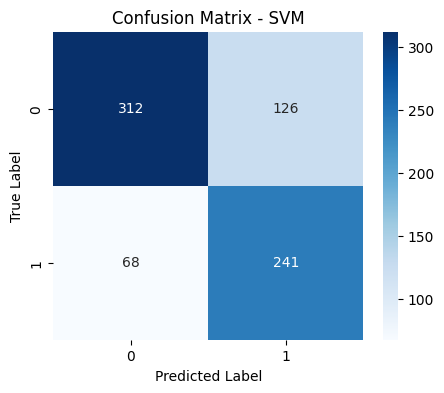


Training KNN...
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       438
           1       0.62      0.71      0.66       309

    accuracy                           0.70       747
   macro avg       0.69      0.70      0.69       747
weighted avg       0.71      0.70      0.70       747



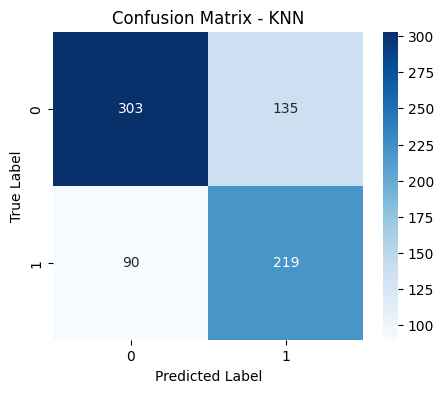


Training Neural Network...
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       438
           1       0.69      0.72      0.70       309

    accuracy                           0.75       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.75      0.75       747



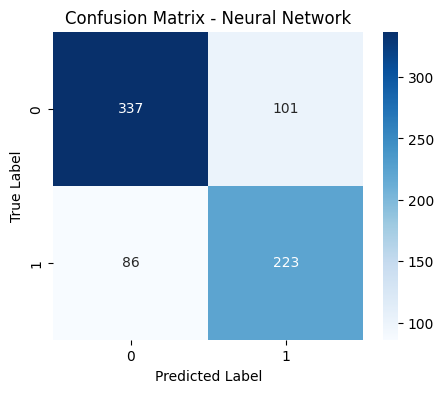

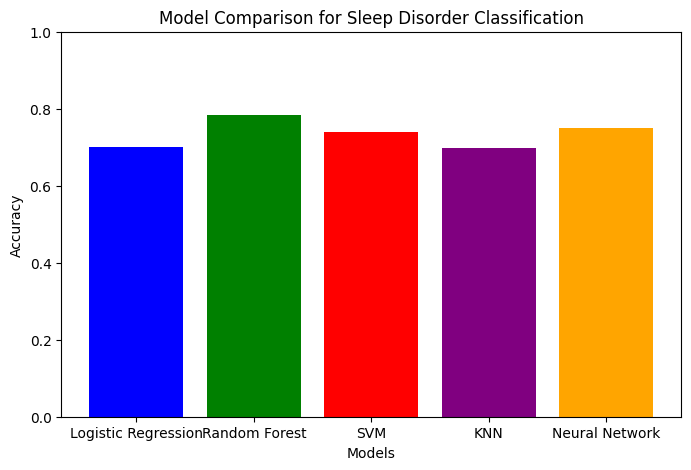

<ipython-input-19-783a6f545371>:116: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




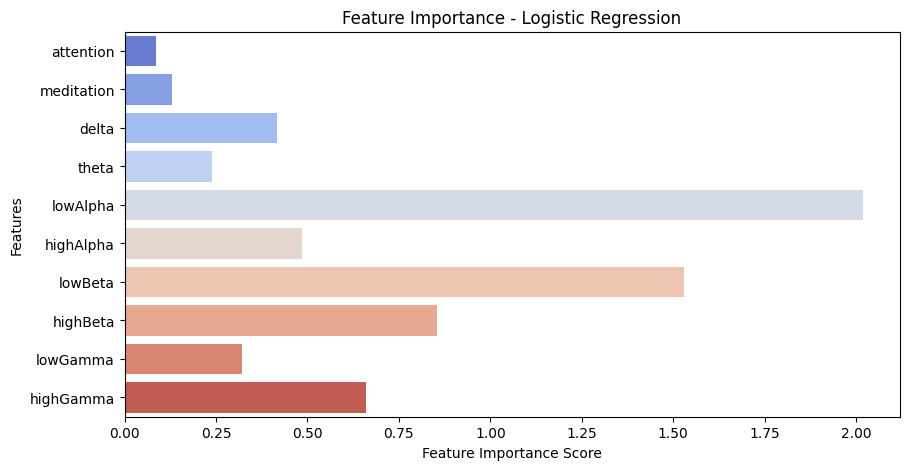

<ipython-input-19-783a6f545371>:116: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




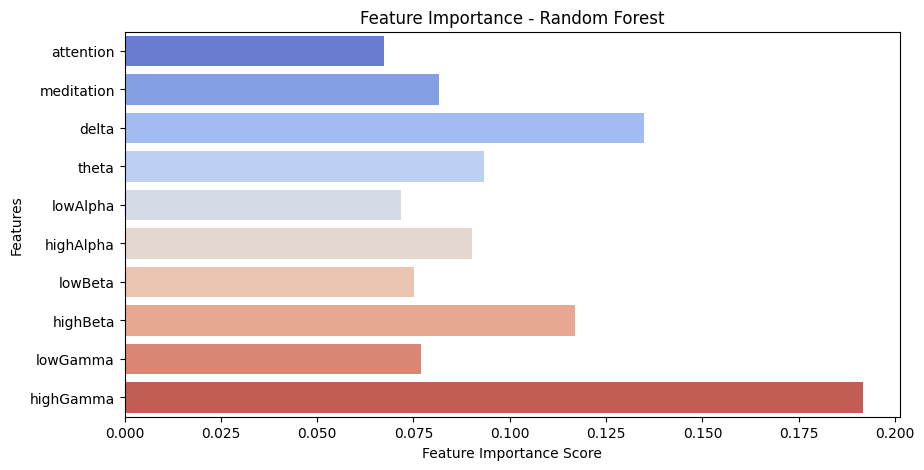

In [19]:
# Import required libraries
import zipfile  # To handle ZIP file extraction
import os  # For file and directory operations
import pandas as pd  # For handling structured data in tabular form
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualization using statistical plots
from sklearn.model_selection import train_test_split  # For splitting dataset into training and test sets
from sklearn.preprocessing import StandardScaler  # For normalizing feature values
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron (Neural Network) classifier

# Extract the ZIP File
zip_file_path = "archive_3.zip"  # Path to the uploaded ZIP file
extract_folder = "sleep_disorder_data"  # Directory to extract the contents

# Extract the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Detect and Load the Dataset
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]  # Find all CSV files

# Ensure there is at least one CSV file
if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the ZIP archive!")

# Load the first CSV file found
dataset_path = os.path.join(extract_folder, csv_files[0])
df = pd.read_csv(dataset_path)

# Explore the Dataset
print("Dataset Overview:")
print(df.head())  # Display first few rows of the dataset
print("\nData Summary:")
print(df.info())  # Show data types and missing values

# Sleep Disorder Data Analysis
plt.figure(figsize=(7, 5))  # Set figure size
sns.countplot(x=df.iloc[:, -1], palette="coolwarm")  # Countplot for class distribution
plt.xlabel("Sleep Disorder Type")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Distribution of Sleep Disorders in Dataset")  # Chart title
plt.show()

# Preprocess the Data
# Assuming the last column contains labels, separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # Select all columns except the last one (features)
y = df.iloc[:, -1]  # Select last column (target labels)

# Normalize features
scaler = StandardScaler()  # Initialize standard scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),  # 100 trees in the forest
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),  # Radial Basis Function kernel, default gamma
    "KNN": KNeighborsClassifier(n_neighbors=5),  # K = 5 nearest neighbors
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)  # 2 hidden layers of 50 neurons each, max 500 iterations
}

# Train and Evaluate Models
results = {}  # Dictionary to store accuracy scores

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    results[name] = accuracy  # Store accuracy score
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5, 4))  # Set figure size
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")  # X-axis label
    plt.ylabel("True Label")  # Y-axis label
    plt.title(f"Confusion Matrix - {name}")  # Chart title
    plt.show()

# Compare Model Performance
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])  # Bar chart for model accuracy
plt.xlabel("Models")  # X-axis label
plt.ylabel("Accuracy")  # Y-axis label
plt.title("Model Comparison for Sleep Disorder Classification")  # Chart title
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# Feature Importance for Different Models
feature_importance_results = {}  # Dictionary to store feature importance scores

for name, model in models.items():
    if hasattr(model, 'coef_'):
        importance = np.mean(np.abs(model.coef_), axis=0)  # Absolute mean of coefficients for models like Logistic Regression
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_  # Feature importance for models like Random Forest
    else:
        continue  # Skip models without feature importance attributes

    feature_importance_results[name] = importance  # Store importance scores

    plt.figure(figsize=(10, 5))  # Set figure size
    sns.barplot(x=importance, y=X.columns, palette="coolwarm")  # Barplot for feature importance
    plt.xlabel("Feature Importance Score")  # X-axis label
    plt.ylabel("Features")  # Y-axis label
    plt.title(f"Feature Importance - {name}")  # Chart title
    plt.show()

AUTO FINDING BEST ACCURACY MODEL BY DETECTING

Dataset Overview:
   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       37

<ipython-input-20-18687a017979>:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




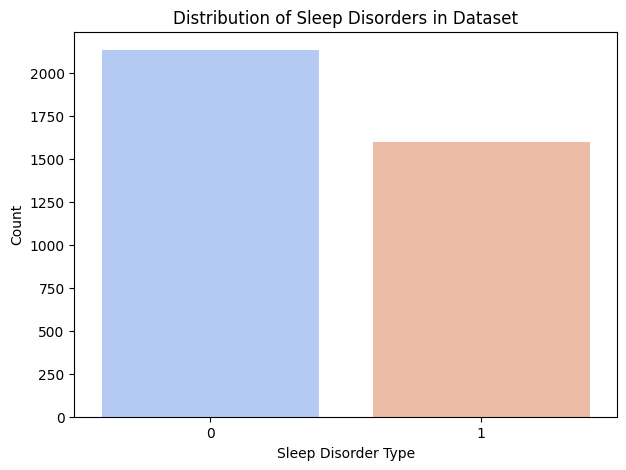


Training Logistic Regression...
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       438
           1       0.63      0.65      0.64       309

    accuracy                           0.70       747
   macro avg       0.69      0.69      0.69       747
weighted avg       0.70      0.70      0.70       747



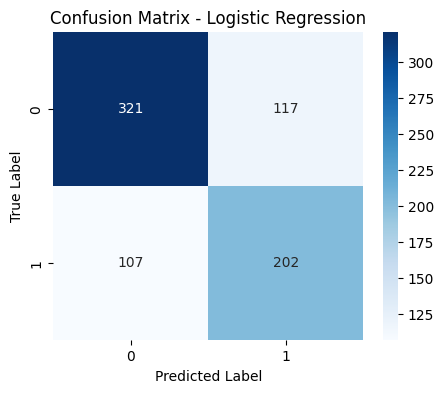


Training Random Forest...
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       438
           1       0.76      0.70      0.73       309

    accuracy                           0.78       747
   macro avg       0.78      0.77      0.78       747
weighted avg       0.78      0.78      0.78       747



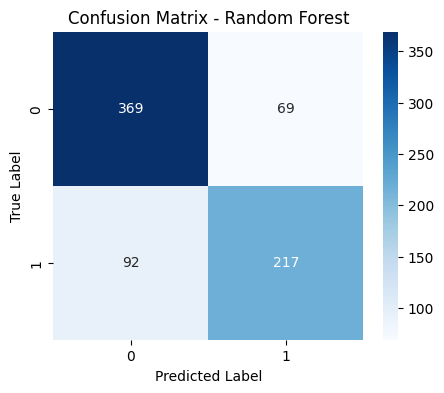


Training SVM...
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       438
           1       0.66      0.78      0.71       309

    accuracy                           0.74       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.74      0.74       747



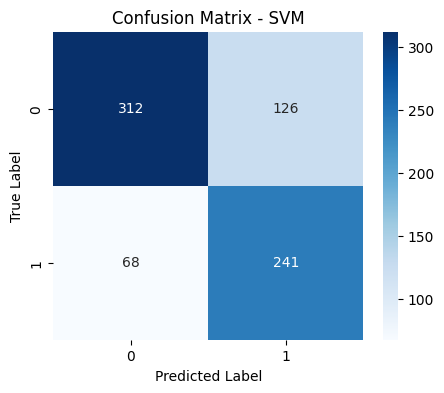


Training KNN...
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       438
           1       0.62      0.71      0.66       309

    accuracy                           0.70       747
   macro avg       0.69      0.70      0.69       747
weighted avg       0.71      0.70      0.70       747



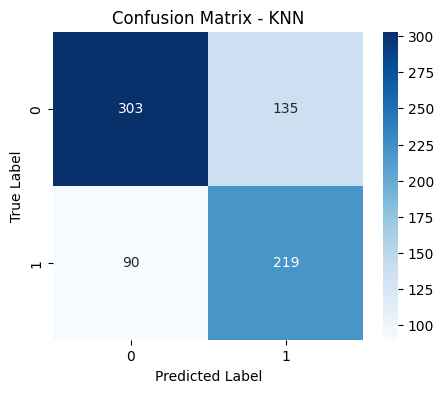


Training Neural Network...
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       438
           1       0.69      0.72      0.70       309

    accuracy                           0.75       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.75      0.75       747



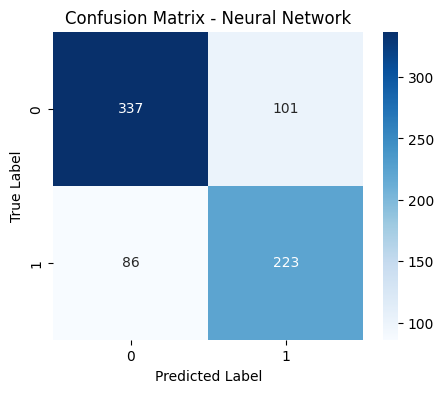


Best Performing Model: Random Forest with Accuracy: 0.78


<ipython-input-20-18687a017979>:117: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




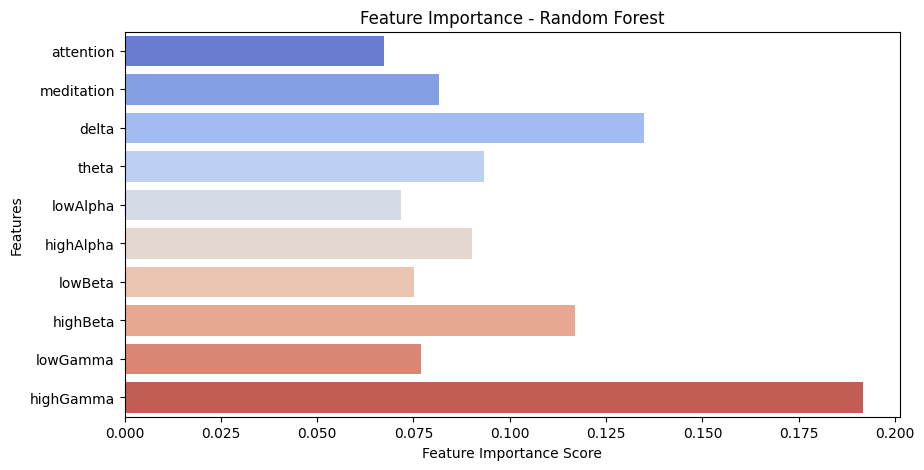

In [20]:
# Import required libraries
import zipfile  # To handle ZIP file extraction
import os  # To interact with the operating system (file paths, directories)
import pandas as pd  # For data manipulation and analysis (DataFrames)
import numpy as np  # For numerical operations (arrays, matrices)
import matplotlib.pyplot as plt  # For data visualization (plots)
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model
from sklearn.svm import SVC  # Support Vector Classifier model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors model
from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron model

# Extract the ZIP File
zip_file_path = "archive_3.zip"  # Path to the uploaded ZIP file
extract_folder = "sleep_disorder_data"  # Folder where the contents of the ZIP file will be extracted

# Open and extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract all files in the ZIP file to the target folder

# Detect and Load the Dataset
# List all CSV files in the extracted folder
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]

# If no CSV file is found, raise an error
if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the ZIP archive!")

# Assuming the first CSV file is the dataset we need
dataset_path = os.path.join(extract_folder, csv_files[0])
df = pd.read_csv(dataset_path)  # Load the dataset into a pandas DataFrame

# Explore the Dataset
# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Display a concise summary of the dataset (data types, non-null counts, etc.)
print("\nData Summary:")
print(df.info())

# Sleep Disorder Data Analysis (Visualization)
# Create a bar plot showing the distribution of sleep disorders (target variable)
plt.figure(figsize=(7, 5))  # Set figure size
sns.countplot(x=df.iloc[:, -1], palette="coolwarm")  # Countplot for the last column (target variable)
plt.xlabel("Sleep Disorder Type")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.title("Distribution of Sleep Disorders in Dataset")  # Title of the plot
plt.show()  # Show the plot

# Preprocess the Data
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df.iloc[:, -1]   # The last column (target: sleep disorder labels)

# Normalize the features using StandardScaler
scaler = StandardScaler()  # Create a StandardScaler object
X_scaled = scaler.fit_transform(X)  # Fit and transform the features to have zero mean and unit variance

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Classification Models
models = {
    "Logistic Regression": LogisticRegression(),  # Logistic Regression model
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),  # Random Forest model with 100 trees
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),  # Support Vector Machine with RBF kernel
    "KNN": KNeighborsClassifier(n_neighbors=5),  # K-Nearest Neighbors with 5 neighbors
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)  # MLP with 2 hidden layers of 50 units
}

# Train and Evaluate Models
results = {}  # Dictionary to store accuracy of each model

# Iterate through each model, train, evaluate, and print the results
for name, model in models.items():
    print(f"\nTraining {name}...")  # Print the current model name
    model.fit(X_train, y_train)  # Train the model with training data
    y_pred = model.predict(X_test)  # Predict labels on the test data

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of the model
    results[name] = accuracy  # Store accuracy in results dictionary
    print(f"Accuracy: {accuracy:.2f}")  # Print accuracy
    print("Classification Report:\n", classification_report(y_test, y_pred))  # Print classification report

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(5, 4))  # Set the figure size
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))  # Confusion matrix
    plt.xlabel("Predicted Label")  # Label for x-axis
    plt.ylabel("True Label")  # Label for y-axis
    plt.title(f"Confusion Matrix - {name}")  # Title of the plot
    plt.show()  # Show the plot

# Compare Model Performance
# Find the model with the highest accuracy
best_model_name = max(results, key=results.get)  # Get the model name with the highest accuracy
best_model = models[best_model_name]  # Get the corresponding model
print(f"\nBest Performing Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")  # Print the best model and its accuracy

# Feature Importance for the Best Model
# Check if the model has coefficients or feature importances
if hasattr(best_model, 'coef_'):
    importance = np.mean(np.abs(best_model.coef_), axis=0)  # For linear models (e.g., Logistic Regression)
elif hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_  # For tree-based models (e.g., Random Forest)
else:
    importance = None  # If no feature importance available

# If importance is available, plot the feature importance
if importance is not None:
    plt.figure(figsize=(10, 5))  # Set figure size
    sns.barplot(x=importance, y=X.columns, palette="coolwarm")  # Bar plot of feature importance
    plt.xlabel("Feature Importance Score")  # Label for x-axis
    plt.ylabel("Features")  # Label for y-axis
    plt.title(f"Feature Importance - {best_model_name}")  # Title of the plot
    plt.show()  # Show the plot


   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditati

<ipython-input-21-078ad764c6b5>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




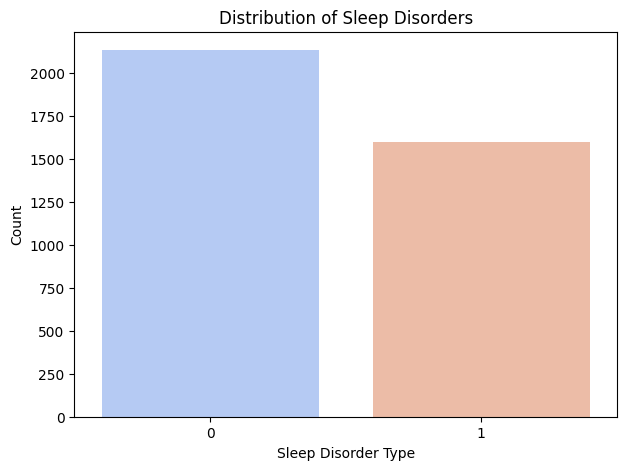

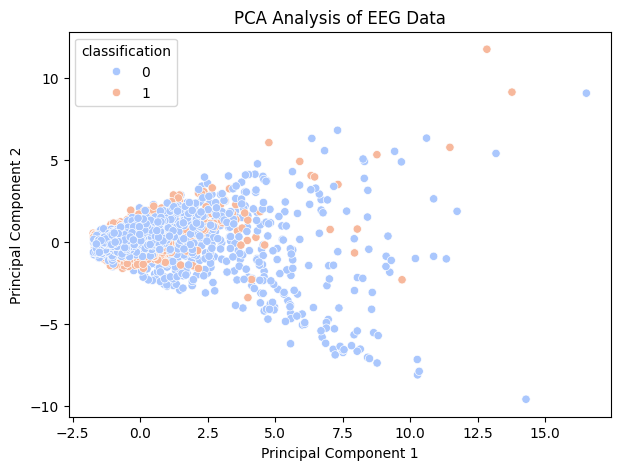

Random Forest Accuracy: 0.78
SVM Accuracy: 0.74


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[19:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Accuracy: 0.80


<ipython-input-21-078ad764c6b5>:104: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




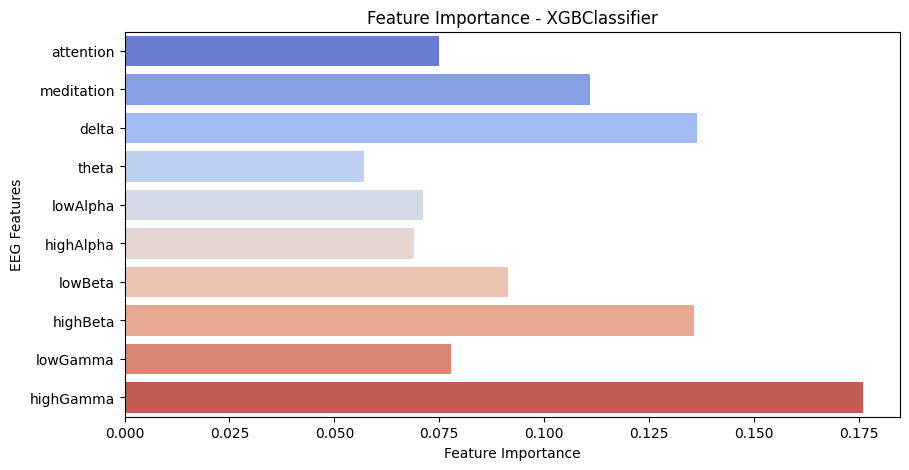

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5635 - loss: 0.6742 - val_accuracy: 0.6319 - val_loss: 0.6313
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6127 - loss: 0.6535 - val_accuracy: 0.6426 - val_loss: 0.6310
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6108 - loss: 0.6526 - val_accuracy: 0.6439 - val_loss: 0.6156
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6239 - loss: 0.6352 - val_accuracy: 0.6466 - val_loss: 0.6347
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6297 - loss: 0.6369 - val_accuracy: 0.6586 - val_loss: 0.6131
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6165 - loss: 0.6311 - val_accuracy: 0.6560 - val_loss: 0.6032
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6359 - loss: 0.6299 - val_accuracy: 0.6560 - val_loss: 0.5927
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6519 - loss: 0.5991 - val_accuracy: 0.6519 - val_loss: 0.5970
E

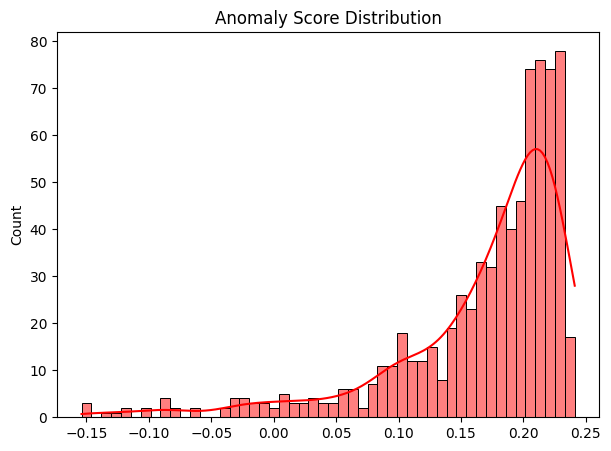

T-test p-value: 1.00000
Chi-Square p-value: 0.00009


In [21]:
# Import required libraries
import zipfile  # For handling ZIP file extraction
import os  # For interacting with the operating system (file paths, directories)
import pandas as pd  # For data manipulation and analysis (DataFrames)
import numpy as np  # For numerical operations (arrays, matrices)
import matplotlib.pyplot as plt  # For data visualization (plots)
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding labels
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.ensemble import RandomForestClassifier, IsolationForest  # For Random Forest and Anomaly Detection models
from sklearn.svm import SVC  # For Support Vector Classifier model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
import xgboost as xgb  # For XGBoost model
from scipy.stats import ttest_ind, chi2_contingency  # For statistical tests (T-test, Chi-Square)
import tensorflow as tf  # For deep learning (TensorFlow)
from tensorflow.keras.models import Sequential  # For building the neural network
from tensorflow.keras.layers import Dense, LSTM, Flatten  # For defining layers in the neural network

# Extract and Load Data
zip_file_path = "archive_3.zip"  # Path to the uploaded ZIP file
extract_folder = "sleep_disorder_data"  # Folder to extract the contents of the ZIP file into

# Open and extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract all files in the ZIP file to the target folder

# Detect and load the dataset
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]  # List all CSV files in the folder
dataset_path = os.path.join(extract_folder, csv_files[0])  # Get the path to the first CSV file
df = pd.read_csv(dataset_path)  # Load the CSV file into a pandas DataFrame

# Data Overview
# Display the first few rows of the dataset
print(df.head())

# Display concise summary information of the dataset (data types, non-null counts, etc.)
print(df.info())

# Encode categorical labels (if the target variable is categorical)
le = LabelEncoder()  # Create a LabelEncoder object
df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])  # Apply label encoding to the last column (target labels)

# Visualize the distribution of sleep disorders (target variable)
plt.figure(figsize=(7, 5))  # Set the figure size
sns.countplot(x=df.iloc[:, -1], palette="coolwarm")  # Countplot for the last column (target variable)
plt.xlabel("Sleep Disorder Type")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.title("Distribution of Sleep Disorders")  # Title of the plot
plt.show()  # Display the plot

# Feature Preprocessing
X = df.iloc[:, :-1]  # Select all columns except the last one (features)
y = df.iloc[:, -1]   # Select the last column (target: sleep disorder labels)

# Normalize the features using StandardScaler (scaling features to zero mean and unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PCA Analysis (Dimensionality Reduction)
pca = PCA(n_components=2)  # Create a PCA object to reduce features to 2 components
X_pca = pca.fit_transform(X_scaled)  # Fit and transform the scaled features to 2D using PCA

# Visualize the PCA analysis in a scatter plot
plt.figure(figsize=(7,5))  # Set the figure size
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm")  # Scatter plot of the 2 PCA components
plt.xlabel("Principal Component 1")  # Label for the x-axis
plt.ylabel("Principal Component 2")  # Label for the y-axis
plt.title("PCA Analysis of EEG Data")  # Title of the plot
plt.show()  # Display the plot

# Train Machine Learning Models
# Define a dictionary of models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),  # Random Forest Classifier
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),  # Support Vector Machine with RBF kernel
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost model
}

best_model, best_acc = None, 0  # Variables to store the best model and accuracy
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

    # If this model has the highest accuracy so far, store it
    if acc > best_acc:
        best_model, best_acc = model, acc

# Feature Importance (Best Model)
# If the best model has feature importances (e.g., Random Forest, XGBoost), visualize it
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_  # Get feature importance values
    plt.figure(figsize=(10,5))  # Set figure size
    sns.barplot(x=importances, y=X.columns, palette="coolwarm")  # Bar plot of feature importance
    plt.xlabel("Feature Importance")  # Label for the x-axis
    plt.ylabel("EEG Features")  # Label for the y-axis
    plt.title(f"Feature Importance - {type(best_model).__name__}")  # Title of the plot
    plt.show()  # Display the plot

# Deep Learning Model (LSTM)
# Reshape the data to 3D for LSTM input (samples, time steps, features)
n_features = X_train.shape[1]  # Number of features
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape training data
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape test data

# Build a Sequential LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_features, 1)),  # LSTM layer with 50 units
    Flatten(),  # Flatten the output from the LSTM layer
    Dense(25, activation='relu'),  # Fully connected layer with 25 units
    Dense(len(np.unique(y)), activation='softmax')  # Output layer with one unit per class (softmax activation)
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))  # Train model

# Anomaly Detection (Isolation Forest)
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Create Isolation Forest model for anomaly detection
iso_forest.fit(X_train)  # Fit the model on the training data
anomaly_scores = iso_forest.decision_function(X_test)  # Get the anomaly scores for the test data

# Visualize the anomaly scores as a histogram
plt.figure(figsize=(7, 5))  # Set figure size
sns.histplot(anomaly_scores, bins=50, kde=True, color='red')  # Histogram of anomaly scores
plt.title("Anomaly Score Distribution")  # Title of the plot
plt.show()  # Display the plot

# Statistical Tests
# T-Test for differences in EEG features (comparing the first two features in the dataset)
t_stat, p_val = ttest_ind(X_scaled[:, 0], X_scaled[:, 1])  # Perform a T-test between two features
print(f"T-test p-value: {p_val:.5f}")  # Print the p-value of the T-test

# Chi-square test to check for associations between the target variable and one of the features
contingency_table = pd.crosstab(df.iloc[:, -1], df.iloc[:, 1])  # Create a contingency table
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)  # Perform the Chi-square test
print(f"Chi-Square p-value: {p:.5f}")  # Print the p-value of the Chi-square test


   attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditati

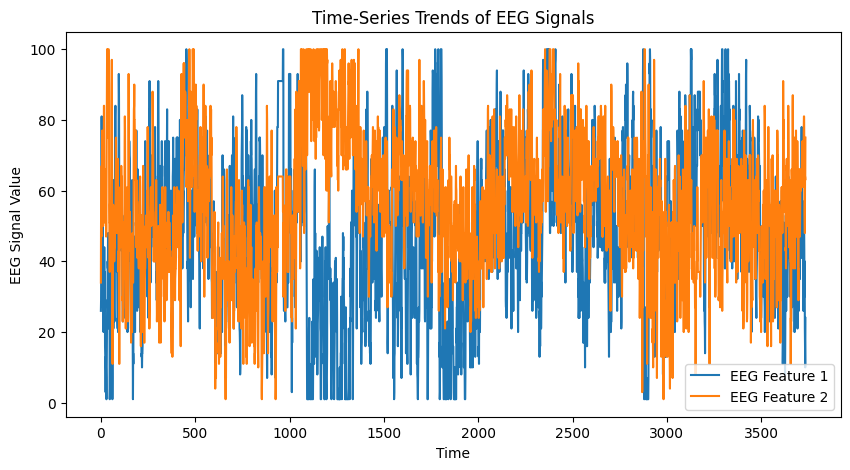

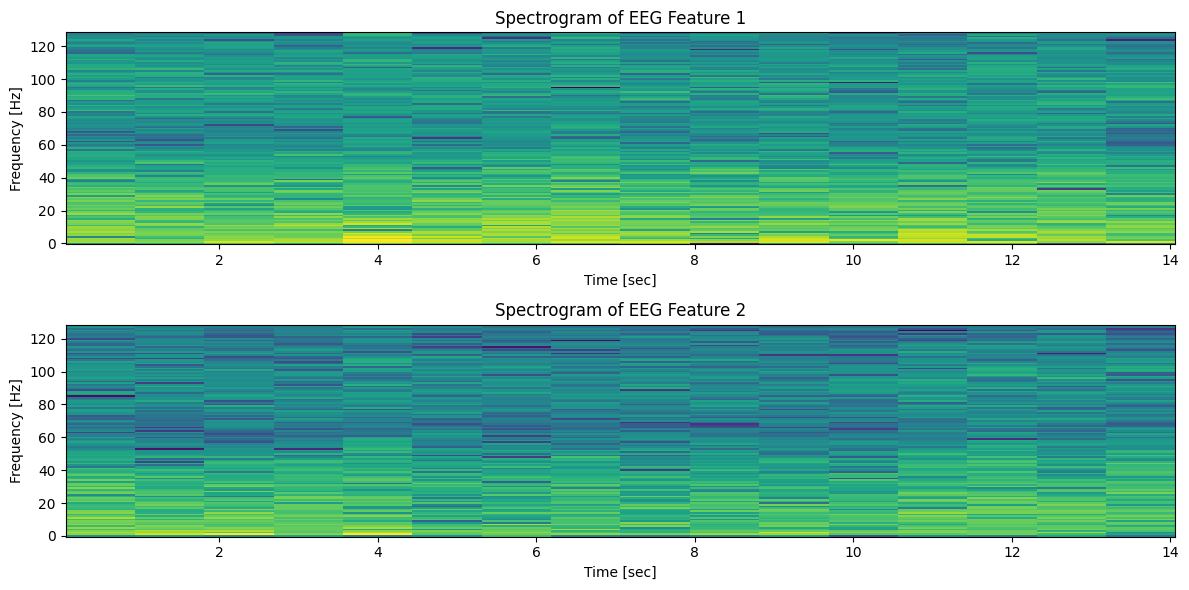

In [22]:
# Import required libraries
import zipfile  # For handling ZIP file extraction
import os  # For interacting with the operating system (file paths, directories)
import pandas as pd  # For data manipulation and analysis (DataFrames)
import numpy as np  # For numerical operations (arrays, matrices)
import matplotlib.pyplot as plt  # For data visualization (plots)
import seaborn as sns  # For advanced data visualization
import scipy.signal as signal  # For signal processing (spectrogram computation)
import librosa.display  # For audio-related visualizations (not used in this code but imported)
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # For Random Forest model
from sklearn.svm import SVC  # For Support Vector Classifier model
from sklearn.metrics import accuracy_score  # For model evaluation (accuracy score)
import xgboost as xgb  # For XGBoost model
from scipy.stats import ttest_ind, chi2_contingency  # For statistical tests (T-test, Chi-Square)

# Extract and Load Data
zip_file_path = "archive_3.zip"  # Path to the uploaded ZIP file
extract_folder = "sleep_disorder_data"  # Folder to extract the contents of the ZIP file into

# Open and extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract all files in the ZIP file to the target folder

# Detect and load the dataset
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]  # List all CSV files in the folder
dataset_path = os.path.join(extract_folder, csv_files[0])  # Get the path to the first CSV file
df = pd.read_csv(dataset_path)  # Load the CSV file into a pandas DataFrame

# Data Overview
# Display the first few rows of the dataset
print(df.head())

# Display concise summary information of the dataset (data types, non-null counts, etc.)
print(df.info())

# Time-Series Trend Analysis
# Plot the trends of the first two EEG features (assumed to be time-series data)
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(df.iloc[:, 0], label="EEG Feature 1")  # Plot the first EEG feature (time-series)
plt.plot(df.iloc[:, 1], label="EEG Feature 2")  # Plot the second EEG feature (time-series)
plt.xlabel("Time")  # Label for the x-axis
plt.ylabel("EEG Signal Value")  # Label for the y-axis
plt.title("Time-Series Trends of EEG Signals")  # Title of the plot
plt.legend()  # Add legend to the plot
plt.show()  # Display the plot

# Spectrogram Visualization
# Compute and plot spectrograms for the first two EEG features (time-frequency representation)
fs = 256  # Sample frequency (assumption about the data)
plt.figure(figsize=(12, 6))  # Set figure size
for i in range(2):  # Loop through the first two EEG features
    f, t, Sxx = signal.spectrogram(df.iloc[:, i], fs)  # Compute the spectrogram for each EEG feature
    plt.subplot(2, 1, i+1)  # Create subplot for each feature (2 rows, 1 column)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Plot the spectrogram (log-scale)
    plt.ylabel('Frequency [Hz]')  # Label for the y-axis (frequency)
    plt.xlabel('Time [sec]')  # Label for the x-axis (time)
    plt.title(f'Spectrogram of EEG Feature {i+1}')  # Title of the plot for each feature
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()  # Display the plot
